# Assignment 2

In [ ]:
# First, setup requires typing the following lines into the terminal:
# pip install --upgrade pip
# python3 -m pip install -r scikit-learn matplotlib pandas numpy seaborn

In [58]:
# system tools
import os
import sys
sys.path.append("../../../../cds-lang-repo/cds-language")

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt

### Setting up the data

In [4]:
# load the data to pandas csv
filename = os.path.join("..", "..", "..", "..", "cds-lang-repo", "cds-language", "data", "fake_or_real_news.csv")
data = pd.read_csv(filename, index_col=0)
data.sample(10)

,title,text,label
9775,Financial Whistleblower Explains What’s About ...,By Isaac Davis How is the government going to ...,FAKE
10486,US Moving ISIS Fighters From Iraq To Syria To ...,"— Jim Jatras (@JimJatras) October 29, 2016 \nJ...",FAKE
644,Can the Democratic party find unified path to ...,Bernie Sanders’s protracted campaign may actua...,REAL
786,"Trump, Ryan tout unity in wake of meeting",Washington (CNN) Donald Trump and House Speake...,REAL
6620,Report: FBI to Move to “Likely Indictment” Of ...,Home / BREAKING NEWS / Report: FBI to Move to ...,FAKE
5114,The Sad Truth About Melania Trump’s Plagiarism...,"First of all, poor Melania. She was just tryin...",REAL
4820,Campaign 2016 is divisive: What it says for th...,"As the GOP becomes whiter, older, and more rel...",REAL
5929,Not Guilty: The Power of Nullification to Coun...,"By John Whitehead, the Rutherford Institute . ...",FAKE
9485,Memo to the Next Administration: Defense Spend...,"Written by Ron Paul Sunday November 13, 2016 I...",FAKE
7399,"This Will END Hillary’s Campaign, HILLARY CLIN...","October 30, 2016 at 1:18 PM \nRight now we are...",FAKE


In [5]:
# create data variables containing data and labels
X = data["text"]
y = data["label"]

In [6]:
# creating a 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X,           # texts for the model
                                                    y,          # classification labels
                                                    test_size=0.2,   # 80/20 split
                                                    random_state=42) # random state for reproducibility

In [67]:
# creating a vectorizer object with the following parameters:
vectorizer = TfidfVectorizer(ngram_range = (1,2),     # unigrams and bigrams
                             lowercase =  True,       # make everything lowercase
                             max_df = 0.95,           # remove 5% most common words
                             min_df = 0.05,           # remove 5% rarest words
                             max_features = 500)      # keep top 500 features

In [68]:
# fit the vectorizer to the data

# fit to the training data
X_train_feats = vectorizer.fit_transform(X_train)

# fit for the test data
X_test_feats = vectorizer.transform(X_test)

# get feature names
feature_names = vectorizer.get_feature_names_out()

### Logistic regression classifier

In [33]:
# fit the classifier to the data
classifierLR = LogisticRegression(random_state=42).fit(X_train_feats, y_train)

In [35]:
# get predictions
y_pred = classifierLR.predict(X_test_feats)
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL'
 'REAL' 'REAL' 'REAL' 'FAKE' 'REAL' 'FAKE' 'FAKE' 'REAL' 'REAL' 'FAKE']


In [60]:
# show 20 most informative features
clf.show_features(vectorizer, y_train, classifierLR, n=20)

FAKE				REAL

-4.9501	of the         		4.5541	candidate      
-4.4089	hillary        		4.3354	business       
-4.0623	but the        		3.2131	court          
-3.1702	number         		2.8834	congress       
-2.6735	economic       		2.8471	statement      
-2.6301	election       		2.6564	gop            
-2.6085	use            		2.5974	than           
-2.5315	cnn            		2.5788	that he        
-2.4291	your           		2.4906	right          
-2.3087	however        		2.4730	senate         
-2.1925	you            		2.4414	fox            
-2.0541	voting         		2.3175	say            
-2.0321	russian        		2.2729	person         
-1.9831	justice        		2.2591	two            
-1.8445	fbi            		2.2393	iraq           
-1.8401	hillary clinton		2.2204	second         
-1.7993	this is        		2.1515	deal           
-1.6674	of this        		2.1276	republicans    
-1.6213	seen           		2.0681	attacks        


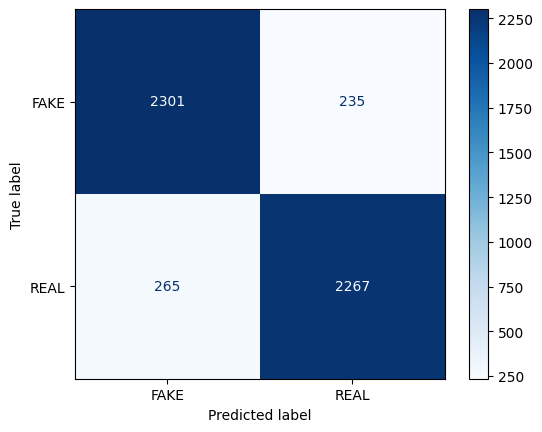

In [73]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifierLR,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in the data arranged alphabetically

In [74]:
# get classification report
classifierLR_metrics = metrics.classification_report(y_test, y_pred)
print(classifierLR_metrics)

              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.88       628
        REAL       0.87      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



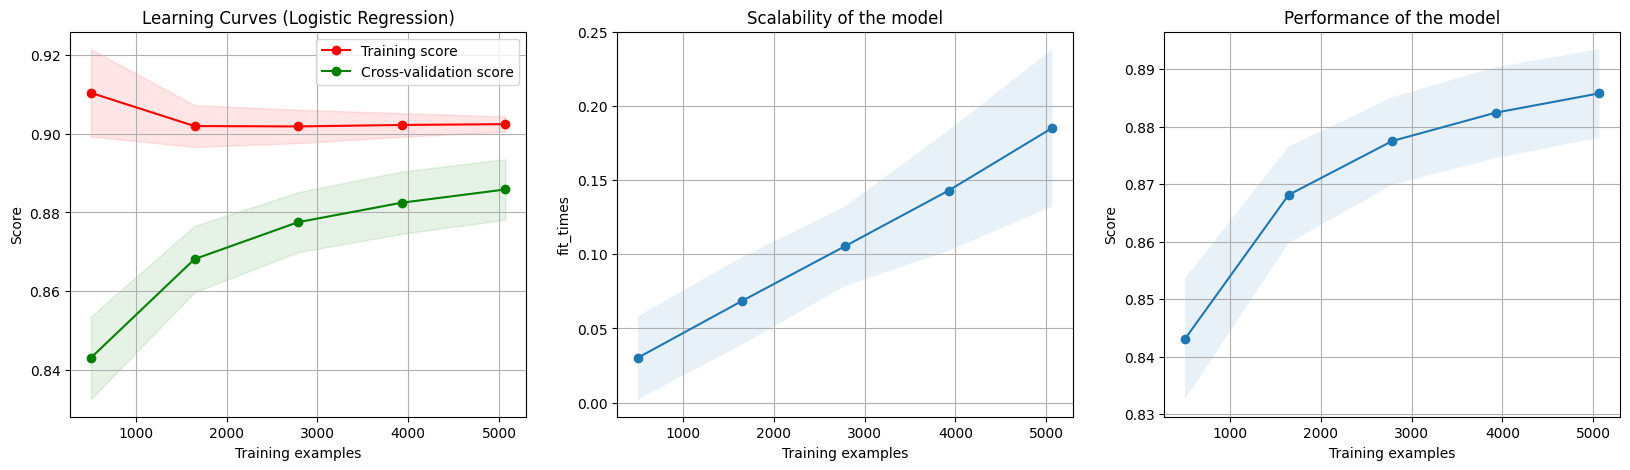

In [75]:
# cross validation
X_vect = vectorizer.fit_transform(X)


title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(random_state=42)
clf.plot_learning_curve(estimator, title, X_vect, y, cv=cv, n_jobs=4)

In [76]:
# saving the model for later use
from joblib import dump, load
model_folder = os.path.join("..", "models")
dump(classifier, model_folder + "/" + "LR_classifier.joblib")
dump(vectorizer, model_folder + "/" + "LR_tfidf_vectorizer.joblib")

['../models/LR_tfidf_vectorizer.joblib']

In [77]:
# loading the saved model to the models folder
from joblib import dump, load
model_folder = os.path.join("..", "models")
loaded_clf = load(model_folder + "/" + "LR_classifier.joblib")
loaded_vect = load(model_folder + "/" + "LR_tfidf_vectorizer.joblib")

In [80]:
# test sentence
sentence = "Hillary Clinton is a crook who eats babies!"

In [81]:
# prediction for the test sentence
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype='<U4')

### Neural network

In [82]:
classifierNN = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,), # 20 neurons in our hidden layer
                           max_iter=1000, # 1000 epochs
                           random_state = 42) # random state for reproducibility

In [83]:
# fit the classifier to the data
classifierNN.fit(X_train_feats, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=42)

In [84]:
# get predictions
y_pred = classifierNN.predict(X_test_feats)
print(y_pred[:20])

['FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'REAL' 'REAL'
 'REAL' 'REAL' 'REAL' 'FAKE' 'FAKE' 'FAKE' 'FAKE' 'REAL' 'FAKE' 'FAKE']


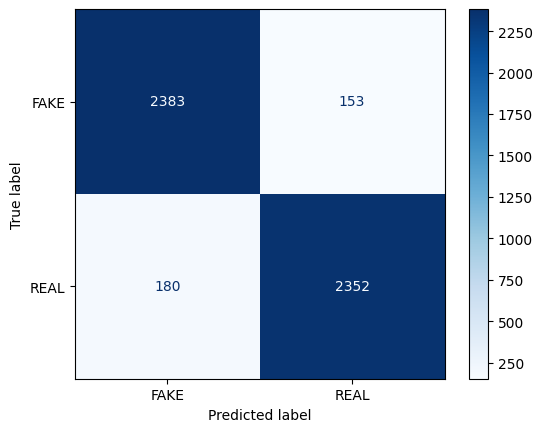

In [85]:
# use confusion matrix to check performance
metrics.ConfusionMatrixDisplay.from_estimator(classifierNN,           # the classifier name
                                            X_train_feats,          # the training features
                                            y_train,                # the training labels
                                            cmap=plt.cm.Blues,      # make the colours prettier
                                            labels=["FAKE", "REAL"])# the labels in the data arranged alphabetically

In [86]:
# get classification report
classifierNN_metrics = metrics.classification_report(y_test, y_pred)
print(classifierNN_metrics)

              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.88       628
        REAL       0.87      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



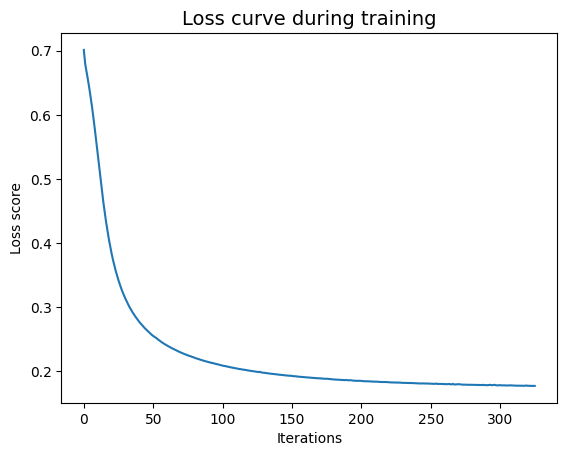

In [87]:
# plotting loss curves. should ideally have a smooth, steep downwards slope which ends in a plateau
plt.plot(classifierNN.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()

In [88]:
# saving the model for later use
from joblib import dump, load
model_folder = os.path.join("..", "models")
dump(classifier, model_folder + "/" + "MLP_classifier.joblib")
dump(vectorizer, model_folder + "/" + "MLP_tfidf_vectorizer.joblib")

['../models/MLP_tfidf_vectorizer.joblib']

In [89]:
# loading the saved model to the models folder
from joblib import dump, load
model_folder = os.path.join("..", "models")
loaded_clf = load(model_folder + "/" + "MLP_classifier.joblib")
loaded_vect = load(model_folder + "/" + "MLP_tfidf_vectorizer.joblib")

In [90]:
# test sentence
sentence = "Donald Trump is a crook who eats babies!"

In [91]:
# prediction for the test sentence
test_sentence = loaded_vect.transform([sentence])
loaded_clf.predict(test_sentence)

array(['FAKE'], dtype='<U4')